<h1> Generating Network Models

The code in this notebook generates the fractal and non-fractal network models described in [1], using the fractal networks toolkit.

**Module Imports**

In [1]:
import fractalnetworks as fn

In [2]:
# Network analysis modules
import networkx as nx
from igraph import Graph
import igraph

# Mathematics modules
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import combinations
import itertools

# Utility modules
import os
from operator import itemgetter

There are several network models available in this notebook, namely:
- Song-Havlin-Makse model
- Hub Attraction Dynamical Growth model
- $(u, v)$-flowers
- Nested Barabási-Albert model

<h2> 1 Song-Havlin-Makse (SHM) Model

A SHM network relies on two predetermined parameters, $m$ and $p$, and is generated as follows

1. Begin with two nodes connected by a single edge. 

2. At stage $t$, $m$ offspring are connected to each endpoint of every node. 

3. Also at stage $t$, each edge in the $(t-1)$-th generation is removed randomly with independent probability $p$ and replaced with an edge between two of the new offspring at the endpoints of this edge.

This procedure is repeated $n$ times. 

**Generating Networks**

To generate a Song-Havlin-Makse network use `fn.generate_SHM_model`.

In [12]:
help(fn.generate_SHM_model)

Help on function generate_SHM_model in module fractalnetworks.SHMmodel:

generate_SHM_model(m, p, n, save=False)
    Generates an n-th generation SHM network with parameters m and p (Song, Havlin, and Makse, 2006).
    
    Args:
        m (int)                      : The number of offspring added at each stage, as defined by the SHM model.
        p (float)                    : The probability of rewiring an edge, as defined by the SHM model.
                                        The value of p should be between 0 and 1.
        n (int)                      : The number of iterations to perform of the SHM generative process.
        save (:obj:`bool`, optional) : If True, the file is saved to the network-files folder. Default is False.
    
    Returns:
        (networkx.Graph) : The generated SHM network.



In [6]:
# Generate a SHM network with m=5, p=0.4, n=3.
SHM_G = fn.generate_SHM_model(5, 0.4, 3)

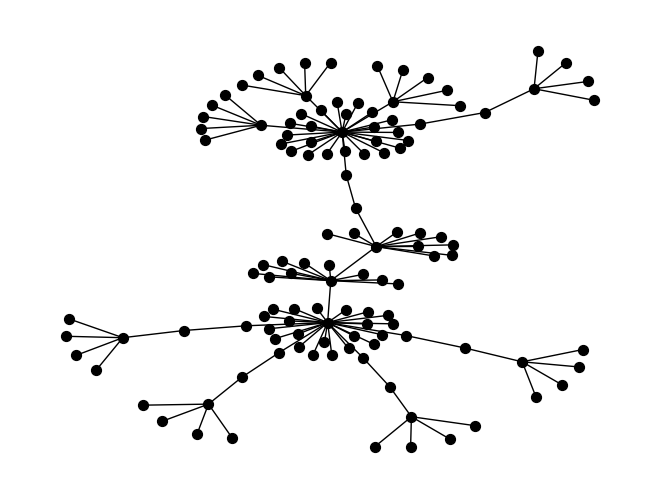

In [8]:
# Display the network
nx.draw_kamada_kawai(SHM_G, node_size=50, node_color = "black")
plt.show()

Alternatively, we can generate SHM networks for a variety of values of $p$. 

In [14]:
help(fn.generate_SHM_model_for_all_p)

Help on function generate_SHM_model_for_all_p in module fractalnetworks.SHMmodel:

generate_SHM_model_for_all_p(m, n, prob_N=11, example_N=1, save=False)
    Generate SHM networks for a fixed m and n, for multiple values of p.
    
    Args:
        m (int)                          : The number of offspring added at each stage, as defined by the SHM model.
        n (int)                          : The number of iterations to perform of the SHM generative process.
        prob_N (int)                     : The number of probabilities to generate the graph for.
                                            Default is 11, so will generate networks with p in [0.0, 0.1, ..., 0.9, 1.0]
        example_N (:obj:`int`, optional) : The number of networks of each probability to generate. Default is 1.
        save (:obj:`bool`, optional)     : If True, save each of the networks to a .gml file. Default is False.
    
    Returns:
        (tuple): Tuple containing numpy.ndarray and list, specificall

In [16]:
# Generate SHM networks with m=3, n=5 and take 21 probabilities, so that p = 0.0, 0.05, 0.10, ..., 0.95, 1.0
SHM_graphs = fn.generate_SHM_model_for_all_p(3, 5, prob_N=21)

Both of the above methods take the optional Boolean argument `save`, which when `True` saves the networks to a gml file.

To find the file path to a saved SHM network use the function `fn.retrieve_SHM_model`.

In [19]:
help(fn.retrieve_SHM_model)

Help on function retrieve_SHM_model in module fractalnetworks.SHMmodel:

retrieve_SHM_model(m, p, n, example=1)
    Given the parameters m, p, n and the example number, retrieve the file containing the SHM network.
    
    Args:
        m (int): The number of offspring added at each stage, as defined by the SHM model [3].
        p (float): The probability of rewiring an edge, as defined by the SHM model [3].
        n (int): The number of iterations to perform of the SHM generative process [3].
        example (int) (opt): In the case of multiple graphs with the same parameters, specifies the example wanted.
                                Default is 1.
    
    Returns:
        (tuple): A tuple containing a networkx.Graph and str, specifically:
                    the saved SHM network with the above specified parameters;
                    the filepath to the network file.



In [21]:
fn.generate_SHM_model(6, 0.1, 3, save=True)
fn.retrieve_SHM_model(6, 0.1, 3, example=1)

(<networkx.classes.graph.Graph at 0x241c4fa3f90>,
 'network-files/models/SHM-model/SHM-model-6-0.1-generation3-example1.gml')

**General Properties of the Network**

The number of edges in a SHM network with parameters $m$ and $n$ is given by, 
\begin{equation}
 e(G_n) = (1+2m)^{n-1}.
\end{equation}

In [24]:
print(len(SHM_G.edges()))

121


This can also be calculated using `fn.SHM_no_of_edges`.

In [27]:
help(fn.SHM_no_of_edges)

Help on function SHM_no_of_edges in module fractalnetworks.modelanalysis:

SHM_no_of_edges(m, n)
    Finds the number of edges in an n-th generation SHM network with parameter m.
    
    Args:
        m (int) : The number of offspring added at each stage,
                    as defined by the SHM model (Song, Havlin, and Makse, 2006).
        n (int) : The number of iterations to perform of the SHM generative process (Song, Havlin, and Makse, 2006).
    
    Returns:
        (int) : The number of edges in the network.



In [29]:
# Calculate the number of edges in a SHM network with m=5, n=4.
fn.SHM_no_of_edges(5, 3)

121

The number of nodes in a SHM network with parameters $m$ and $n$ is one more than the number of edges,
\begin{equation}
 v(G_n) = (1+2m)^{n-1} + 1.
\end{equation}

In [34]:
print(len(SHM_G.nodes()))

122


This can also be calculated using `fn.SHM_no_of_nodes`.

In [37]:
help(fn.SHM_no_of_nodes)

Help on function SHM_no_of_nodes in module fractalnetworks.modelanalysis:

SHM_no_of_nodes(m, n)
    Finds the number of nodes in an n-th generation SHM network with parameter m.
    
    Args:
        m (int) : The number of offspring added at each stage,
                    as defined by the SHM model (Song, Havlin, and Makse, 2006).
        n (int) : The number of iterations to perform of the SHM generative process  (Song, Havlin, and Makse, 2006).
    
    Returns:
        (int) : The number of nodes in the network.



In [39]:
# Calculate the number of nodes in a SHM network with m=5, n=4.
fn.SHM_no_of_nodes(5, 3)

122

We can check that these expressions are true for given parameters $m$ and $n$ using `fn.check_SHM_no_of_edges` and `fn.check_SHM_no_of_nodes`.

In [44]:
help(fn.check_SHM_no_of_edges)

Help on function check_SHM_no_of_edges in module fractalnetworks.modelanalysis:

check_SHM_no_of_edges(m, n)
    Checks the validity of the number of edges of an SHM network calculating according to analytical arguments in [1]
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006)
        n (int) : The parameter n in the SHM network model (Song, Havlin, and Makse, 2006)
    
    Returns:
        (bool) : True if the analytical and empirical value agree, False otherwise.



In [48]:
# Check that the analytical expression for the number of edges is true for a network with m=3, n=6
fn.check_SHM_no_of_edges(3, 6)

True

In [50]:
help(fn.check_SHM_no_of_nodes)

Help on function check_SHM_no_of_nodes in module fractalnetworks.modelanalysis:

check_SHM_no_of_nodes(m, n)
    Checks the validity of the number of nodes of an SHM network calculating according to analytical arguments in [1]
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006)
        n (int) : The parameter n in the SHM network model (Song, Havlin, and Makse, 2006)
    
    Returns:
        (bool) : True if the analytical and empirical value agree, False otherwise.



In [52]:
# Check that the analytical expression for the number of nodes is true for a network with m=3, n=6
fn.check_SHM_no_of_nodes(3, 6)

True

**Analysing the Degree Distribution**

We can find deterministically the degree distribution of SHM networks for $p=0$ and $p=1$.

`fn.SHM_p0_degree_prob(m, d, N)` finds the probability that a node has degree $d$ in a SHM network with parameters $m, N$ and $p=0$.<br>
`fn.SHM_p1_degree_prob(m, d, N)` does the same for $p=1$.

In a network with $p=0$, nodes can only have degree $(m+1)^k$ for some $k$.<br>
In a network with $p=1$, nodes can only have degree $m^k$ or $2m^k$ for some $k$.

In [59]:
help(fn.SHM_p0_degree_prob)

Help on function SHM_p0_degree_prob in module fractalnetworks.modelanalysis:

SHM_p0_degree_prob(m, d, n)
    Calculates the probability P(d) for a given degree d in an SHM network with parameters m, n and p=0.
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006).
        d (int) : The degree to find the probability density P(d) for.
        n (int) : The parameter N in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (float) : The probability P(d) from the degree distribution.



In [63]:
help(fn.SHM_p1_degree_prob)

Help on function SHM_p1_degree_prob in module fractalnetworks.modelanalysis:

SHM_p1_degree_prob(m, d, n)
    Calculates the probability P(d) for a given degree d in an SHM network with parameters m, N and p=1.
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006).
        d (int) : The degree to find the probability density P(d) for.
        n (int) : The parameter n in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (float) : The probability P(d) from the degree distribution.



In [61]:
fn.SHM_p0_degree_prob(2, 9, 7)

0.031997952131063614

In [65]:
fn.SHM_p1_degree_prob(2, 9, 7)

0

In [67]:
fn.SHM_p0_degree_prob(2, 4, 7)

0

In [69]:
fn.SHM_p1_degree_prob(2, 4, 7)

0.09599385639319083

We can check that the calculated degree distribution is correct by comparing it to the true distribution of a generated network using `fn.check_SHM_p0_degree_prob` and `fn.check_SHM_p1_degree_prob`.

In [72]:
help(fn.check_SHM_p0_degree_prob)

Help on function check_SHM_p0_degree_prob in module fractalnetworks.modelanalysis:

check_SHM_p0_degree_prob(m, d, n)
    Checks the accuracy of the calculated degree probability, according to analytical arguments.
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006).
        d (int) : The degree to find the probability density P(d) for.
        n (int) : The parameter N in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (bool) : True if the two values agree, and False if they disagree.



In [75]:
help(fn.check_SHM_p1_degree_prob)

Help on function check_SHM_p1_degree_prob in module fractalnetworks.modelanalysis:

check_SHM_p1_degree_prob(m, d, n)
    Checks the accuracy of the calculated degree probability, according to analytical arguments.
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006).
        d (int) : The degree to find the probability density P(d) for.
        n (int) : The parameter n in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (bool) : True if the two values agree, and False if they disagree.



In [77]:
fn.check_SHM_p0_degree_prob(2, 9, 7)

True

In [79]:
fn.check_SHM_p1_degree_prob(2, 4, 7)

True

We can find the entire degree distribution with `fn.SHM_p0_degree_dist(m, N)` and `fn.SHM_p1_degree_dist(m, N)`.
The functions return a list of the degrees which appear in the network, and a list of their respective probabilities.

In [84]:
help(fn.SHM_p0_degree_dist)

Help on function SHM_p0_degree_dist in module fractalnetworks.modelanalysis:

SHM_p0_degree_dist(m, n)
    Calculates the degree distribution of an SHM network with p=0
    
    Args:
        m (int) : The parameter m in the SHM network model to test (Song, Havlin, and Makse, 2006).
        n (int) : The parameter N in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (tuple) : Tuple containing two lists, specifically:
                    a list of the degrees in the network;
                    a list of probabilities of a node having a given degree.



In [5]:
help(fn.SHM_p1_degree_dist)

Help on function SHM_p1_degree_dist in module fractalnetworks.modelanalysis:

SHM_p1_degree_dist(m, n)
    Calculates the degree distribution of an SHM network with p=1
    
    Args:
        m (int): The parameter m in the SHM network model to test (Song, Havlin, and Makse, 2006)
        n (int): The parameter n in the SHM network model (Song, Havlin, and Makse, 2006)
    
    Returns:
        (tuple) : A tuple containing two lists, specifically:
                    a list of the degrees in the network;
                    and a list of probabilities of a node having a given degree, where degree_dist[i] is P(degrees[i])



In [7]:
fn.SHM_p0_degree_dist(4, 3)

([1, 5, 25], [0.8780487804878049, 0.0975609756097561, 0.024390243902439025])

In [9]:
fn.SHM_p1_degree_dist(4, 3)

([1, 2, 4, 8, 16],
 [0.6585365853658537,
  0.21951219512195122,
  0.07317073170731707,
  0.024390243902439025,
  0.024390243902439025])

We can check the calculation with `fn.check_SHM_p0_degree_dist(m, N)` and `fn.check_SHM_p1_degree_dist(m, N)`.

In [14]:
help(fn.check_SHM_p0_degree_dist)

Help on function check_SHM_p0_degree_dist in module fractalnetworks.modelanalysis:

check_SHM_p0_degree_dist(m, n)
    Checks the accuracy of the calculated degree distribution, according to analytical arguments.
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006).
        n (int) : The parameter n in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (bool) : True if the two distributions agree, and False if they disagree.



In [16]:
help(fn.check_SHM_p1_degree_dist)

Help on function check_SHM_p1_degree_dist in module fractalnetworks.modelanalysis:

check_SHM_p1_degree_dist(m, n)
    Checks the accuracy of the calculated degree distribution, according to analytical arguments.
    
    Args:
        m (int) : The parameter m in the SHM network model (Song, Havlin, and Makse, 2006).
        n (int) : The parameter n in the SHM network model (Song, Havlin, and Makse, 2006).
    
    Returns:
        (bool) : True if the two distributions agree, and False if they disagree.



In [18]:
fn.check_SHM_p0_degree_dist(4, 3)

True

In [20]:
fn.check_SHM_p1_degree_dist(4, 3)

True

This works for all values of $m$ and $N$.

In [22]:
correct = True
for N in [1,2,3,4,5]:
    for m in [2,3,4,5,6,7,8,9,10]:
        correct = correct and fn.check_SHM_p0_degree_dist(m, N)
if correct:
    print("All distributions are correct!")

All distributions are correct!


In [24]:
correct = True
for N in [1,2,3,4,5]:
    for m in [2,3,4,5,6,7,8,9,10]:
        correct = correct and fn.check_SHM_p1_degree_dist(m, N)
if correct:
    print("All distributions are correct!")

All distributions are correct!


SHM networks with parameters $p=0$ and $p=1$ are scale free, that is their degree distributions follow a power law of the form, 
\begin{equation} P(k) \approx k ^ {-\lambda}. \end{equation}
The value of $\lambda$ can be approximated by, 
\begin{equation}\lambda = \frac{\ln (1+2m)}{\ln (1+m)}, \end{equation} when $p=0$ and \begin{equation}\lambda = \frac{\ln (1+2m)}{\ln m}, \end{equation} when $p=1$.

We can compare the "true" value of $\lambda$ against the approximated value for $p=0$ using `fn.check_SHM_p0_lambda`.

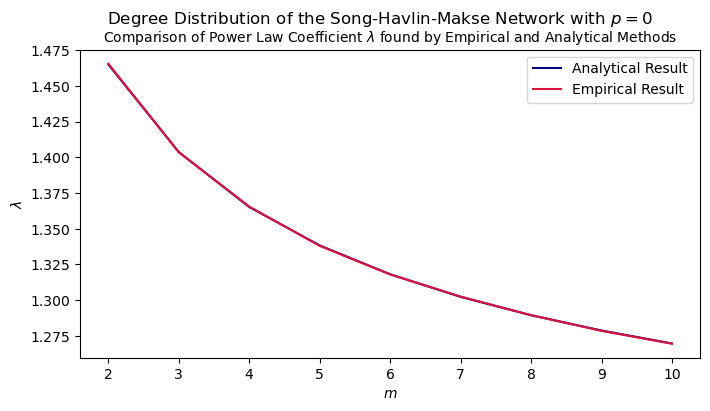

In [29]:
empirical, analytical = fn.check_SHM_p0_lambda(10, 10, plot=True, verbose=False)

<h2>2 Hub Attraction Dynamical Growth (HADG) Model

The HADG model [4] is similar to the SHM model with some adaptations. It relies on predetermined parameters $a, b$ and $T$, where $0 \le a < b \le 1$ and $0 < T \le 1$.

1. Begin with two nodes connected by a single edge. 

2. At stage $t$, $m$ offspring are connected to each endpoint of every node. 

3. Also at stage $t$, each edge $(u,v)$ in the $(t-1)$-th generation is removed randomly with independent probability
    \begin{align}
     p_{uv} = \begin{cases}
                 a, & \text{ if } \frac{d_{t-1}(u)}{d_{t-1}^\text{max}} > T \text{ and } \frac{d_{t-1}(v)}{d_{t-1}^\text{max}} > T, \\
                 b, & \text { otherwise.}
                 \end{cases}
    \end{align}
    where $d_{t-1}(x)$ is the degree of the node $x$ at time $t-1$ and $d_{t-1}^\text{max}$ is the maximum degree in the network at time $t-1$, and replaced with an edge between two of the new offspring at the endpoints of this edge.
    
4. At stage $t$, for each node $v$ in the $(t-1)$-th stage $d_{t-1}(v)$ edges are added between the new offspring of $v$.

This procedure is repeated $n$ times. 

**Generating Networks**

To generate a HADG model use `fn.generate_HADG_model`.

In [33]:
help(fn.generate_HADG_model)

Help on function generate_HADG_model in module fractalnetworks.HADGmodel:

generate_HADG_model(m, a, b, T, n, save=False)
    Generates an n-th generation HADG network with parameters m, a, b and T  (Kuang et al., 2013).
    
    Args:
        m (int)                      : The number of offspring added at each stage.
        a (float)                    : The probability of rewiring an edge if node degree is over the threshold.
        b (float)                    : The probability of rewiring an edge otherwise.
        T (float)                    : The threshold for hubs.
        n (int)                      : The number of iterations to perform of the HADG generative process.
        save (:obj:`bool`, optional) : If True, saved the resulting network to a gml file. Default is False.
    
    Returns:
        G (networkx.Graph) : The resulting HADG network.



In [37]:
# Generates a HADG network with m=4, a=0.5, b=0.7, T=0.2 and n=3.
HADG_G = fn.generate_HADG_model(4, 0.5, 0.7, 0.2, 3)

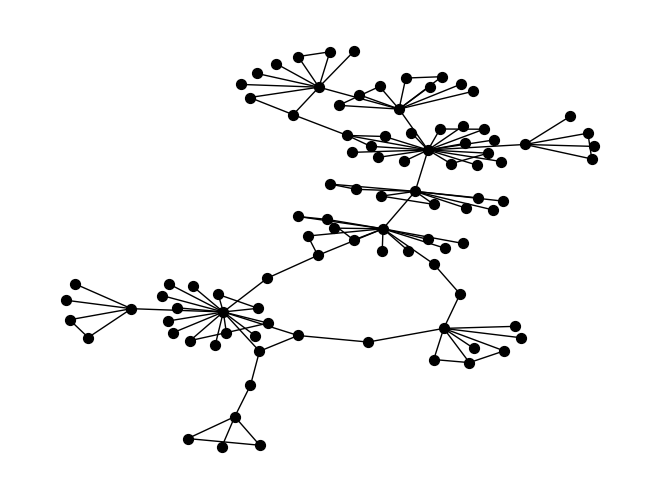

In [39]:
# Display the network
nx.draw_kamada_kawai(HADG_G, node_size=50, node_color = "black")
plt.show()

**General Properties of the Network**

The number of edges in a HADG network with parameters $m$ and $n$ is given by, 
\begin{equation}
 e(G_n) = (2m+3)^{n-1}.
\end{equation}

In [41]:
len(HADG_G.edges())

121

This can also be calculated with `fn.HADG_no_of_edges`.

In [44]:
help(fn.HADG_no_of_edges)

Help on function HADG_no_of_edges in module fractalnetworks.modelanalysis:

HADG_no_of_edges(m, n)
    Finds the number of edges in an n-th generation HADG network with parameter m (Kuang et al., 2013).
    
    Args:
        m (int) : The number of offspring added at each stage, as defined by the HADG model (Kuang et al., 2013).
        n (int) : The number of iterations to perform of the HADG generative process (Kuang et al., 2013).
    
    Returns:
        (int) : The number of edges in the network.



In [48]:
# Number of edges in a HADG network with m=4, n=3
fn.HADG_no_of_edges(4, 3)

121

The number of nodes in a HADG network with parameters $m$ and $n$ is given by, 
\begin{equation}
 v(G_n) = 2 + \sum_{t=2}^{n} 2m \cdot (2m+3)^{t-2}.
\end{equation}

In [50]:
len(HADG_G.nodes())

98

This can also be calculated with `fn.HADG_no_of_nodes`.

In [53]:
help(fn.HADG_no_of_nodes)

Help on function HADG_no_of_nodes in module fractalnetworks.modelanalysis:

HADG_no_of_nodes(m, n)
    Finds the number of nodes in an n-th generation HADG network with parameter m (Kuang et al., 2013).
    
    Args:
        m (int) : The number of offspring added at each stage, as defined by the HADG model (Kuang et al., 2013).
        n (int) : The number of iterations to perform of the HADG generative process (Kuang et al., 2013).
    
    Returns:
        N (int) : The number of nodes in the network.



In [55]:
# Number of nodes in a HADG network with m=4, n=3
fn.HADG_no_of_nodes(4, 3)

98

We can check that these expressions are true for given parameters $m$ and $n$ using `fn.check_HADG_no_of_edges` and `fn.check_HADG_no_of_nodes`.

In [58]:
help(fn.check_HADG_no_of_edges)

Help on function check_HADG_no_of_edges in module fractalnetworks.modelanalysis:

check_HADG_no_of_edges(m, n)
    Checks the validity of the number of edges of a HADG network calculating according to analytical arguments.
    
    Args:
        m (int) : The parameter m in the HADG network model (Kuang et al., 2013).
        n (int) : The parameter n in the HADG network model (Kuang et al., 2013).
    
    Returns:
        (bool) : True if the analytical and empirical value agree, False otherwise.



In [60]:
help(fn.check_HADG_no_of_nodes)

Help on function check_HADG_no_of_nodes in module fractalnetworks.modelanalysis:

check_HADG_no_of_nodes(m, n)
    Checks the validity of the number of nodes of a HADG network calculating according to analytical arguments.
    
    Args:
        m (int) : The parameter m in the HADG network model (Kuang et al., 2013).
        n (int) : The parameter n in the HADG network model (Kuang et al., 2013).
    
    Returns:
        (bool) : True if the analytical and empirical value agree, False otherwise.



In [62]:
# Check that the analytical expression for the number of edges is true for a network with m=5, n=4
fn.check_SHM_no_of_edges(5, 4)

True

In [64]:
# Check that the analytical expression for the number of nodes is true for a network with m=5, n=4
fn.check_SHM_no_of_nodes(5, 4)

True

<h2>3 $(u,v)$-Flowers

A $(u, v)$-flower [2], with $1\le u<v$, is generated as follows:

1. Begin with a cycle graph of length $w= u+v$.

2. In the $n$-th generation, replace each edge in the graph from the $(n-1)$-th generation with two parallel paths, one of length $u$ and the other of length $v$.

The networks are fractal when $u >1$ and non-fractal when $u=1$.

**Generating Networks**

The function `fn.generate_uv_flower` generates a $(u,v)$ flower with parameters $u$, $v$ and $n$.

In [70]:
help(fn.generate_uv_flower)

Help on function generate_uv_flower in module fractalnetworks.uvflowermodel:

generate_uv_flower(u, v, n, save=False)
    Generates an n-th generation (u,v)-flower.
    
    Args:
        u (int)                      : Value of u, i.e. path length of one of the parallel paths.
        v (int)                      : Value of v, i.e. path length of one of the parallel paths.
        n (int)                      : Number of generations.
        save (:obj:`bool`, optional) : If True, the file is saved to the network-files folder. Default is False.
    
    Returns:
        (networkx.Graph) : The generated (u,v)-flower.



In [13]:
# Generate a 4th generation (2,3)-flower
fractal_flower_G = fn.generate_uv_flower(2, 3, 4)

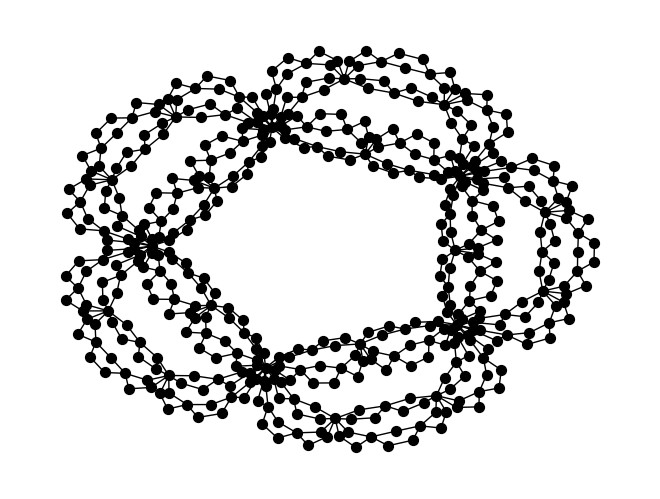

In [77]:
# Display the network
nx.draw_kamada_kawai(fractal_flower_G, node_size=50, node_color = "black")
plt.show()

To generate a non-fractal $(1, v)$-flower you can use `fn.generate_non_fractal_uv_flower`. 

In [81]:
help(fn.generate_non_fractal_uv_flower)

Help on function generate_non_fractal_uv_flower in module fractalnetworks.uvflowermodel:

generate_non_fractal_uv_flower(v, n)
    Generates a non-fractal (u,v)-flower with u=1.
    
    Args:
        v (int) : Value of v, i.e. path length of the parallel paths.
        n (int) : Number of generations.
    
    Returns:
        (networkx.Graph) : The generated (u,v)-flower.



In [15]:
# Generate a 4th generation (1,3)-flower
non_fractal_flower_G = fn.generate_non_fractal_uv_flower(3, 4)

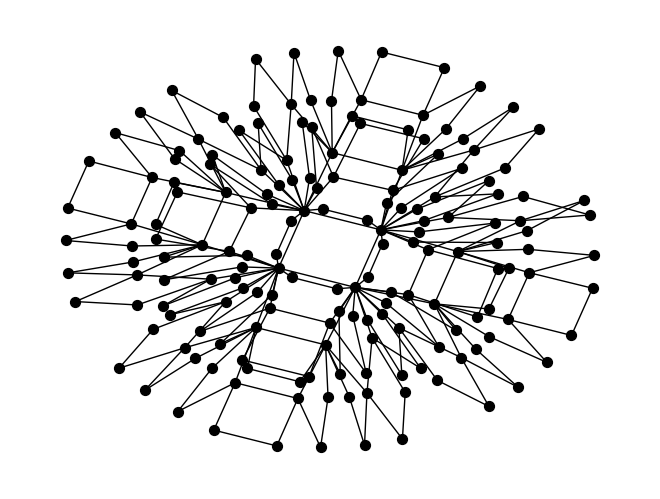

In [88]:
# Display the network
nx.draw_kamada_kawai(non_fractal_flower_G, node_size=50, node_color = "black")
plt.show()

**General Properties of the Network**

The number of edges in a $n$-th generation $(u,v)$-flower is given by, 
\begin{equation}
 e(G_n) = (u+v)^n.
\end{equation}

In [90]:
len(fractal_flower_G.edges())

625

In [92]:
len(non_fractal_flower_G.edges())

256

This can also be calculated with `fn.uv_flower_no_of_edges`.

In [5]:
help(fn.uv_flower_no_of_edges)

Help on function uv_flower_no_of_edges in module fractalnetworks.modelanalysis:

uv_flower_no_of_edges(u, v, n)
    Finds the number of edges in an n-th generation (u,v)-flower network (Rozenfeld, Havlin, and ben-Avraham, 2007).
    
    Args:
        u (int) : Value of u, i.e. path length of one of the parallel paths.
        v (int) : Value of v, i.e. path length of one of the parallel paths.
        n (int) : Number of generations.
    
    Returns:
        (int) : The number of edges in the network.



In [7]:
# Calculate the number of edges in a 4th generation (2,3)-flower
fn.uv_flower_no_of_edges(2, 3, 4)

625

In [9]:
# Calculate the number of edges in a 4th generation (1,3)-flower
fn.uv_flower_no_of_edges(1, 3, 4)

256

The number of nodes in a $n$-th generation $(u,v)$-flower is given by,
\begin{equation}
 v(G_n) = \frac{w-2}{w-1}w^n +\frac{w}{w-1},
\end{equation}
where $w = u+v$.

In [17]:
len(fractal_flower_G.nodes())

470

In [19]:
len(non_fractal_flower_G.nodes())

172

This can also be calculated with `fn.uv_flower_no_of_nodes`.

In [7]:
help(fn.uv_flower_no_of_nodes)

Help on function uv_flower_no_of_nodes in module fractalnetworks.modelanalysis:

uv_flower_no_of_nodes(u, v, n)
    Finds the number of nodes in an n-th generation (u,v)-flower network (Rozenfeld, Havlin, and ben-Avraham, 2007).
    
    Args:
        u (int) : Value of u, i.e. path length of one of the parallel paths.
        v (int) : Value of v, i.e. path length of one of the parallel paths.
        n (int) : Number of generations.
    
    Returns:
        (int) : The number of nodes in the network.



In [25]:
# Calculate the number of nodes in a 4th generation (2,3)-flower
fn.uv_flower_no_of_nodes(2, 3, 4)

470

In [27]:
# Calculate the number of nodes in a 4th generation (1,3)-flower
fn.uv_flower_no_of_nodes(1, 3, 4)

172

We can check that these expressions are true for given parameters $u$, $v$ and $n$ using `fn.check_uv_flower_no_of_edges` and `fn.check_uv_flower_no_of_nodes`.

In [30]:
help(fn.check_uv_flower_no_of_edges)

Help on function check_uv_flower_no_of_edges in module fractalnetworks.modelanalysis:

check_uv_flower_no_of_edges(u, v, n)
    Checks the validity of the number of edges of a (u,v)-flower network calculating according to analytical arguments.
    
    Args:
        u (int) : Value of u, i.e. path length of one of the parallel paths.
        v (int) : Value of v, i.e. path length of one of the parallel paths.
        n (int) : Number of generations.
    
    Returns:
        (bool) : True if the analytical and empirical value agree, False otherwise.



In [9]:
help(fn.check_uv_flower_no_of_nodes)

Help on function check_uv_flower_no_of_nodes in module fractalnetworks.modelanalysis:

check_uv_flower_no_of_nodes(u, v, n)
    Checks the validity of the number of nodes of a (u,v)-flower network calculating according to analytical arguments.
    
    Args:
        u (int) : Value of u, i.e. path length of one of the parallel paths.
        v (int) : Value of v, i.e. path length of one of the parallel paths.
        n (int) : Number of generations.
    
    Returns:
        (bool) : True if the analytical and empirical value agree, False otherwise.



In [14]:
# Check that the analytical expression for the number of edges is true for a flower with u=2, v=5, n=4
fn.check_uv_flower_no_of_edges(2, 5, 4)

True

In [15]:
# Check that the analytical expression for the number of nodes is true for a flower with u=2, v=5, n=4
fn.check_uv_flower_no_of_nodes(2, 5, 4)

True

<h2>4 Nested Barabási-Albert Model

The Nested BA model [6] is based on the classic Barabási-Albert model and is generated as follows.

1. Generate a Barabási-Albert network with parameter $m$ which grows until the most connected node in the network has degree $k_\text{max}$

2. Choose a node $v$ with probability proportionate to its degree $k$.

3. Generate a Barabási-Albert network which grows until the most connected node in the network has degree $k$. Replace the node $v$ chosen in step 2 with this subnetwork. Reattach the edges of $v$ to nodes in the new subnetwork chosen uniformly at random. 

4. Repeat steps 2 and 3 until the network has order at least $N$.

**Generating Networks**

The function `fn.generate_nested_BA_model` generates a nested BA network with parameters $m$, $N$ and $k_\max$.

In [19]:
help(fn.generate_nested_BA_model)

Help on function generate_nested_BA_model in module fractalnetworks.nestedBAmodel:

generate_nested_BA_model(m, N, kmax, save=False)
    Generated a nested Barabasi-Albert (BA) network of order > N with parameters m, k [6].
    Some of this code is taken from the NetworkX barabasi_albert_graph function.
    
    Args:
        m (int): The number of edges attached to a newly created node in the generation of a BA network.
        N (int): The minimum order (number of nodes) of the network.
        kmax (int): The maximum degree of the original BA network [6].
        save (Bool) (opt): If True, saved the resulting network to a gml file. Default is False.
    
    Returns:
        G (networkx.Graph): The resulting nested BA network.



In [21]:
# Generate a nested BA network with at least 100 nodes and parameters m=3 and kmax = 12
nested_BA_G = fn.generate_nested_BA_model(3, 100, 12)

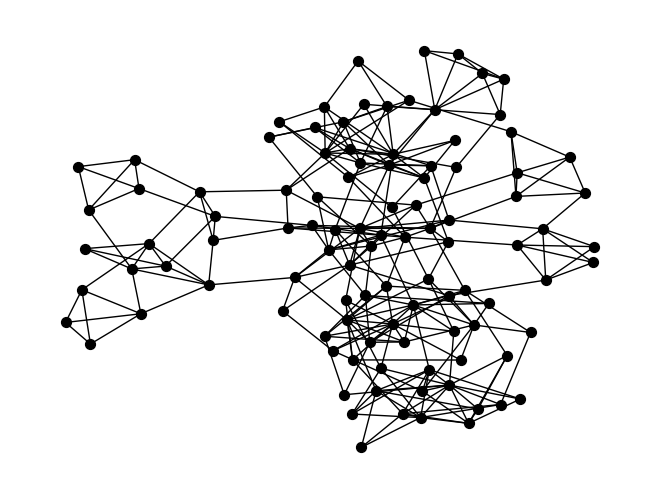

In [23]:
# Display the network
nx.draw_kamada_kawai(nested_BA_G, node_size=50, node_color = "black")
plt.show()

<h2>5 Barabási-Albert Model

The `NetworkX` package provides a function to generate Barabási-Albert networks. The function `fn.generate_barabasi_albert_network` generates such networks and saves them to a folder of network files.

In [10]:
help(fn.generate_barabasi_albert_network)

Help on function generate_barabasi_albert_network in module fractalnetworks.modelgenerator:

generate_barabasi_albert_network(m, N, save=False)
    Generates a Barabasi-Albert network with parameters m and N.
    
    Args:
        m (int) : The number of edges added to each newly added node.
        N (int) : The number of nodes in the network.
        save (bool) (opt) : If True, the file is saved to the network-files folder. Default is False.
    
    Returns:
        (networkx.Graph) : The generated Barabasi-Albert network.



In [12]:
BA_G = fn.generate_barabasi_albert_network(4, 100)

<h1> References

[1] K. Hamilton, "Origins of Fractality in Complex Networks" *MSc Thesis* 

[2] H. D. Rozenfeld, L. K. Gallos, C. Song, and H. A. Makse, “Fractal and transfractal scale-free networks,” in
Encyclopedia of Complexity and Systems Science. Springer New York, 2009, pp. 3924–3943

[3] C. Song, S. Havlin, and H. A. Makse, “Origins of fractality in the growth of complex networks,” Nature Physics,
vol. 2, pp. 275–281, 2006.

[4] L. Kuang, B. Zheng, D. Li, Y. Li, Y. Sun, "A fractal and scale-free model of complex networks with hub attraction behaviors," Science China Information Sciences, vol. 58, pp. 1–10, 2015. 

[5] E. Zakar-Poly ́ak, M. Nagy, and R. Molontay, “Towards a better understanding of the characteristics of fractal
networks,” Applied Network Science, vol. 8, pp. 1–34, 2022

[6] Fronczak, A. et al. “Scaling theory of fractal complex networks”. In: Scientific Reports 14.1, 2024